# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'IG'

In [4]:

df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

### Calculate means

In [5]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [6]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0

,all,person,no person,animal,sports,electronic
aim,4.055746,3.956261,4.241619,3.827007,3.956798,4.169001
cas,4.231368,4.176831,4.333261,3.971037,4.297402,4.264198
covsal,3.528594,3.477678,3.623720,3.427408,3.469458,3.584478
gbvs,4.501970,4.427618,4.640883,4.312813,4.501297,4.590538
icf,4.153634,4.090457,4.271671,3.962489,3.825227,4.306453
ik,3.826670,3.771883,3.928224,3.562992,3.690323,3.879304
sun,3.904741,3.806608,4.088084,3.572123,3.792475,3.976477


In [7]:
df_f07

,all,person,no person,animal,sports,electronic
aim,4.087649,4.005014,4.242038,3.838691,3.978666,4.214791
cas,4.257557,4.217665,4.332090,3.976744,4.306524,4.294048
covsal,3.312088,3.165738,3.585518,3.345565,3.283836,3.268093
gbvs,4.521447,4.457889,4.640195,4.321091,4.508560,4.617173
icf,4.117146,4.036376,4.268052,3.924893,3.771533,4.251068
ik,3.770486,3.688350,3.923115,3.546479,3.569876,3.790887
sun,3.941269,3.863973,4.085683,3.582699,3.816954,4.021014


In [8]:
df_diff_f03 = ((df_f03 - df0) / df0)*100
df_diff_f05 = ((df_f05 - df0) / df0)*100
df_diff_f07 = ((df_f07 - df0) / df0)*100

In [9]:
df_diff_f03

,all,person,no person,animal,sports,electronic
aim,0.250771,0.391647,0.005276,0.096172,0.170474,0.347574
cas,0.374534,0.581705,0.001441,0.124638,0.187152,0.499524
covsal,0.283007,0.474493,-0.060335,0.543170,-0.007886,0.376744
gbvs,0.257366,0.399377,0.004234,0.104562,0.116152,0.352252
icf,0.068006,0.108240,-0.003976,-0.028876,0.007688,0.080255
ik,-0.460961,-0.719900,0.007450,0.155572,-2.410622,-0.289786
sun,0.717136,1.128031,0.002306,0.272058,0.460902,0.978207


In [10]:
df_diff_f03 = calc_means(df_diff_f03)
df_diff_f05 = calc_means(df_diff_f05)
df_diff_f07 = calc_means(df_diff_f07)

In [11]:
df_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,0.786593,1.232309,0.009872,0.305292,0.552669,1.098341,0.664179
cas,0.618945,0.977636,-0.027017,0.143715,0.212279,0.699995,0.437592
covsal,-6.135758,-8.969791,-1.054241,-2.387914,-5.350178,-8.826507,-5.454065
gbvs,0.432645,0.683683,-0.014823,0.191945,0.161355,0.580199,0.339167
icf,-0.878454,-1.322113,-0.084715,-0.948805,-1.403687,-1.286086,-0.987310
ik,-1.468211,-2.214622,-0.130071,-0.463441,-3.263879,-2.279203,-1.636571
sun,0.935488,1.506980,-0.058732,0.296065,0.645469,1.120018,0.740881
mean model,-0.815536,-1.157988,-0.194247,-0.409020,-1.206567,-1.270463,-0.842304


In [12]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,0.210319,0.402818,0.664179
cas,0.294832,0.436350,0.437592
covsal,0.268199,-1.937190,-5.454065
gbvs,0.205657,0.330105,0.339167
icf,0.038556,-0.084867,-0.987310
ik,-0.619708,-0.898310,-1.636571
sun,0.593107,0.791242,0.740881
mean model,0.141566,-0.137122,-0.842304


In [13]:
matplotlib.rcParams.update({'font.size': 26})

In [14]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
mean_context_diff.index = mean_context_diff.index.str.upper()

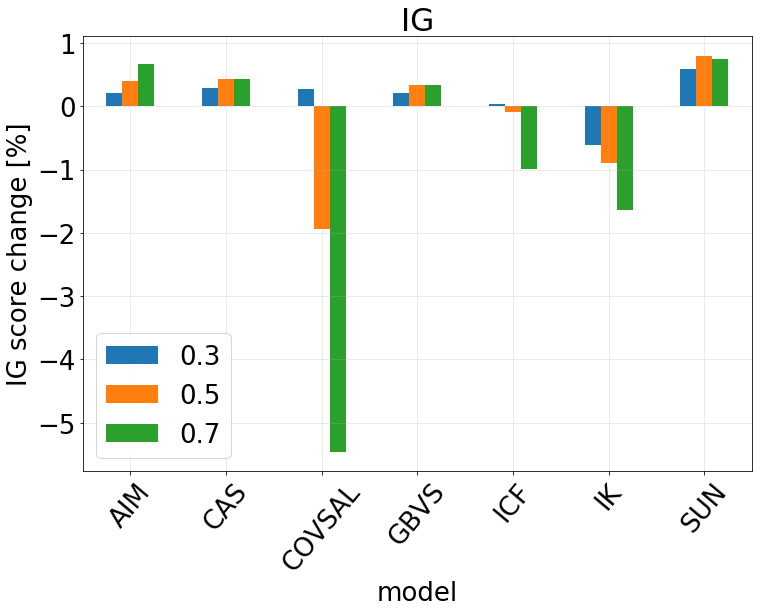

In [15]:
fig, ax = plt.subplots(figsize=(12, 8));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
plt.title('IG')
plt.ylabel(metric+' score change [%]');
plt.xlabel('model')
plt.xticks(rotation=50)


plt.savefig('../plots/'+metric+'_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [16]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,0.212837,-0.070823,-0.815536
person,0.337656,-0.068582,-1.157988
no person,-0.006229,-0.068194,-0.194247
animal,0.181042,0.016155,-0.409020
sports,-0.210877,-0.520088,-1.206567
electronic,0.334967,-0.111198,-1.270463
mean context,0.141566,-0.137122,-0.842304


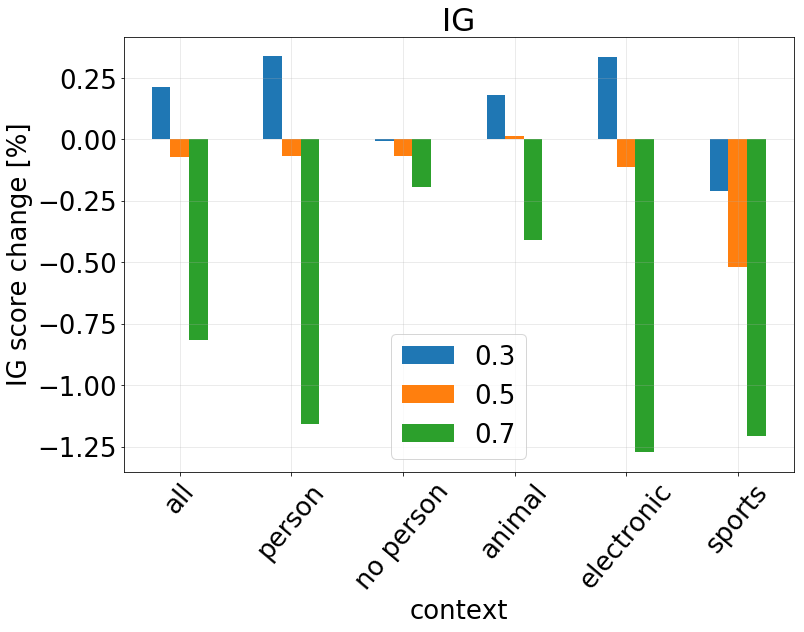

In [17]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(12, 8));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

plt.title('IG')
plt.ylabel(metric+' score change [%]');
plt.xlabel('context')
plt.xticks(rotation=50)

plt.savefig('../plots/'+metric+'_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)